In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torcheval.metrics.functional import r2_score

torch.manual_seed(69420)

df = pd.read_csv('Student_Marks.csv')
dataset = df[['time_study', 'Marks']]
dataset.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


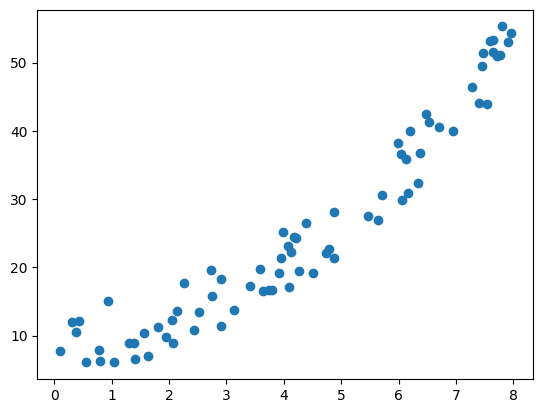

In [2]:
X = dataset['time_study'].to_numpy().reshape(-1, 1)
y = dataset['Marks'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

plt.scatter(X_train, y_train)

In [3]:
torch.manual_seed(69)

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        neurons = 10
        
        self.seq = nn.Sequential(
            nn.Linear(1, neurons),
            nn.ReLU(),
            nn.Linear(neurons, neurons),
            nn.ReLU(),
            nn.Linear(neurons, 1),
        )
        
    def forward(self, x):
        out = self.seq(x)
        return out

    
model = LinearRegression()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

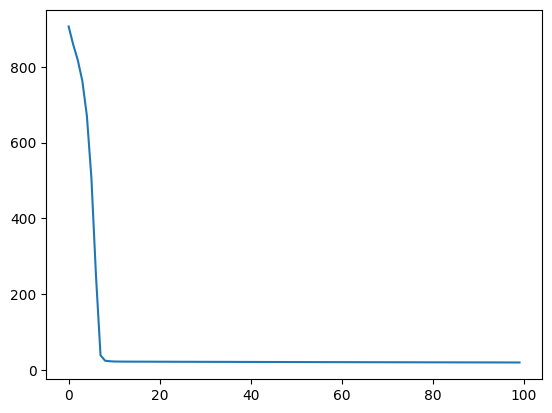

In [4]:
losses = np.array([])

model.train()
for epoch in range(100):
    total_loss = 0
    
    optimizer.zero_grad()
    
    target = torch.from_numpy(X_train.astype(np.float32))
    label = torch.from_numpy(y_train.astype(np.float32))
    
    preds = model(target)
    loss = loss_func(preds, label)
    
    loss.backward()
    optimizer.step()
    
    losses = np.append(losses, loss.item())
    
plt.plot(losses)

tensor(0.8460, dtype=torch.float64)

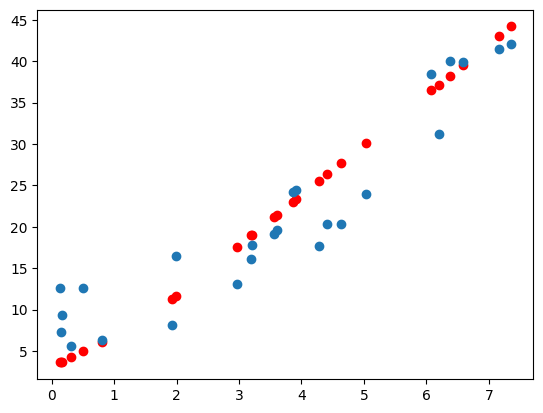

In [16]:
model.eval()
preds = np.array([])
total_loss = 0
for i in range(len(X_test)):
    target = torch.from_numpy(X_test[i].astype(np.float32))
    label = torch.from_numpy(y_test[i].astype(np.float32))

    with torch.no_grad():
        pred = model(target)
        
    preds = np.append(preds, pred)
    
plt.scatter(X_test, preds, color='r')
plt.scatter(X_test, y_test)
r2_score(torch.from_numpy(preds).view(-1, 1), torch.from_numpy(y_test))

tensor(0.9142, dtype=torch.float64)

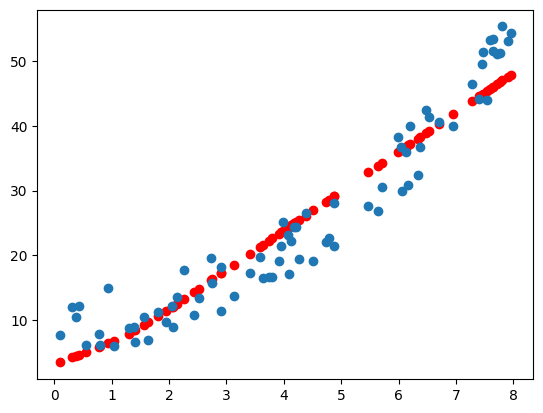

In [17]:
model.eval()
preds = np.array([])
total_loss = 0
for i in range(len(X_train)):
    target = torch.from_numpy(X_train[i].astype(np.float32))
    label = torch.from_numpy(y_train[i].astype(np.float32))

    with torch.no_grad():
        pred = model(target)
        
    preds = np.append(preds, pred)
    
plt.scatter(X_train, preds, color='r')
plt.scatter(X_train, y_train)
r2_score(torch.from_numpy(preds).view(-1, 1), torch.from_numpy(y_train))